# Data importing & Dependencies

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

Matplotlib is building the font cache; this may take a moment.


In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 140s 12us/step


In [3]:
len(X_train)

60000

In [4]:
X_train[0].shape

(28, 28)

In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

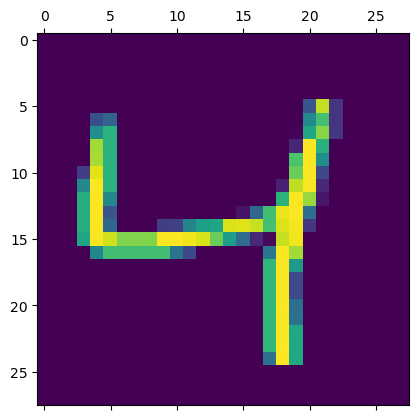

In [6]:
plt.matshow(X_train[2])

In [7]:
y_train[2]

4

# image re-shaping

In [8]:
X_train.shape

(60000, 28, 28)

In [9]:
X_train = X_train/255
X_test = X_test/255

In [10]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [11]:
X_train_flattened.shape

(60000, 784)

In [12]:
X_test_flattened.shape

(10000, 784)

In [13]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4751 - accuracy: 0.8766
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3047 - accuracy: 0.9146
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2841 - accuracy: 0.9204
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2733 - accuracy: 0.9238
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2666 - accuracy: 0.9263


In [14]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.2681 - accuracy: 0.9261


[0.2681233286857605, 0.9261000156402588]

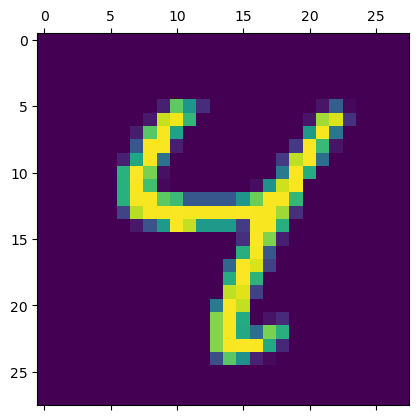

In [15]:
plt.matshow(X_test[6])

In [16]:
y_predicted = model.predict(X_test_flattened)
y_predicted[6]

313/313 [==============================] - 1s 3ms/step


array([4.5038428e-04, 5.4209955e-05, 1.5756047e-04, 3.4762800e-02,
       9.9339992e-01, 3.0996159e-01, 1.1640660e-02, 1.6053806e-01,
       7.1638054e-01, 6.9984806e-01], dtype=float32)

In [17]:
np.argmax(y_predicted[6])

4

In [18]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [19]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

In [20]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    0,    2,    0,    5,    9,    2,    1,    0],
       [   0, 1117,    3,    2,    0,    1,    4,    2,    6,    0],
       [   8,   12,  914,   19,    7,    4,   13,   10,   40,    5],
       [   4,    0,   12,  931,    0,   19,    3,   10,   22,    9],
       [   1,    1,    2,    2,  900,    0,   14,    4,   10,   48],
       [  10,    3,    2,   40,   10,  761,   20,    6,   33,    7],
       [   8,    3,    3,    1,    7,    8,  923,    2,    3,    0],
       [   1,    7,   21,   10,    3,    0,    0,  944,    3,   39],
       [   5,   10,    5,   25,    9,   19,   10,    8,  875,    8],
       [  10,    7,    1,   12,   14,    5,    0,   18,    7,  935]])>

Text(95.72222222222221, 0.5, 'Truth')

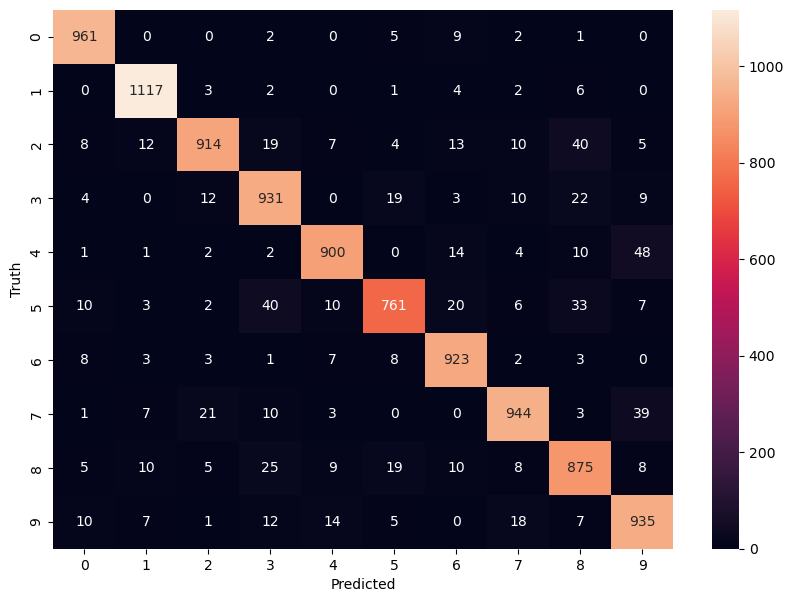

In [21]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [22]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 15s 7ms/step - loss: 0.2702 - accuracy: 0.9239
Epoch 2/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.1226 - accuracy: 0.9639
Epoch 3/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0862 - accuracy: 0.9740
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0661 - accuracy: 0.9799
Epoch 5/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0523 - accuracy: 0.9838


In [23]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0838 - accuracy: 0.9766


[0.08377600461244583, 0.9765999913215637]

313/313 [==============================] - 1s 4ms/step


Text(95.72222222222221, 0.5, 'Truth')

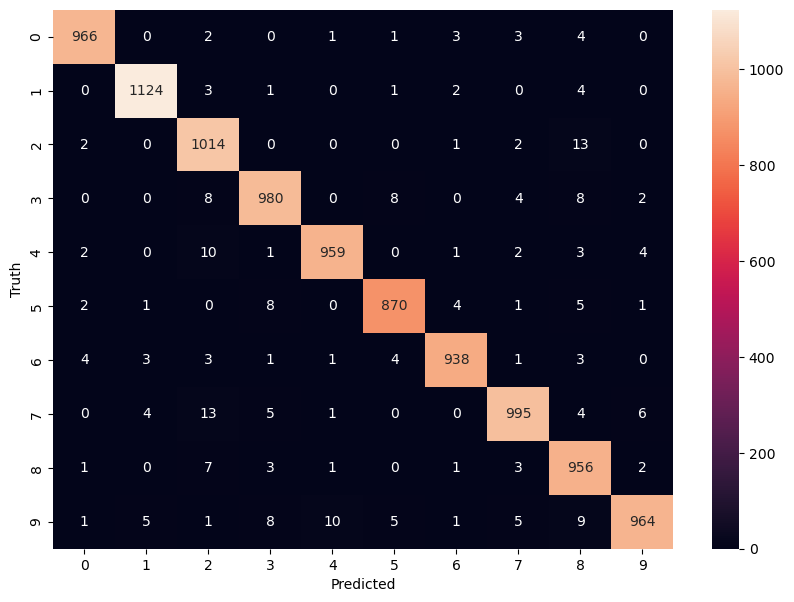

In [24]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [25]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 15s 7ms/step - loss: 0.2710 - accuracy: 0.9236
Epoch 2/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1201 - accuracy: 0.9643
Epoch 3/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0837 - accuracy: 0.9748
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0651 - accuracy: 0.9805
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0508 - accuracy: 0.9851
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0418 - accuracy: 0.9869
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0341 - accuracy: 0.9894
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0277 - accuracy: 0.9909
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0233 - accuracy: 0.9929
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 

In [26]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0820 - accuracy: 0.9772


[0.08198188990354538, 0.9771999716758728]